# Descriptive and Predictive Analytics 
    
Project on Advanced Analytics in Fundraising - “How knowing donors helps in growing donors”

In [366]:
# Installing the required Packages

import sys
import pandas               as pd
import numpy                as np
import seaborn              as sns
import matplotlib.pyplot    as plt
from pandas                 import DataFrame
from pandas                 import read_csv
from pandas                 import Series
from numpy                  import array
from numpy                  import random
#from ieseg                  import detect_outlier
from matplotlib             import pyplot
import warnings
warnings.filterwarnings("ignore")

In [367]:
# Read all source CSV files and store them in  required variables
campaign = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/campaigns.csv",sep=";")
donor = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/donors.csv",sep=",")
gift = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/gifts.csv",sep=",")
train_set = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/selection campaign 6169.csv",sep=",")
test_set = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/selection campaign 7244.csv",sep=",")

In [368]:
campaign.count()

campaignID     367
date           367
lettersSent    367
CostUnit       367
dtype: int64

In [369]:
donor.count()

Unnamed: 0     44691
donorID        44691
zipcode        44689
province       44691
region         44691
gender         44659
language       44691
dateOfBirth    44691
dtype: int64

In [370]:
gift.count()

Unnamed: 0    216594
donorID       216594
campaignID    200957
amount        216594
date          216594
dtype: int64

# Data Preprocess//Data Cleaning

# Gifts Table

In [371]:
gift = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/gifts.csv",sep=",")

In [372]:
gift.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,"12,39",2004-03-23
1,1,100001,1577.0,"12,39",2007-10-11
2,2,100001,1634.0,"6,69",2007-12-28
3,3,100001,1778.0,"24,79",2008-06-14
4,4,100001,1808.0,"7,44",2008-07-09


In [373]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  216594 non-null  int64  
 1   donorID     216594 non-null  int64  
 2   campaignID  200957 non-null  float64
 3   amount      216594 non-null  object 
 4   date        216594 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.3+ MB


In [374]:
#check null value columns
gift.isna().sum()

Unnamed: 0        0
donorID           0
campaignID    15637
amount            0
date              0
dtype: int64

 We have 1 column having missing values and the rest are of wrong data type:

1) Changing the type of date column to date type
2) Changing the campaignID to int, and handling the missing values of this column
3) Changing datatype of amount to int as we use this for mathematical calculations

In [375]:
#changing date datatype
gift['date'] = pd.to_datetime(gift['date'])

In [376]:
#replace comma with dot from amount before converting it to float
gift['amount']= gift['amount'].str.replace(',','')

In [377]:
gift.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,1239,2004-03-23
1,1,100001,1577.0,1239,2007-10-11
2,2,100001,1634.0,669,2007-12-28
3,3,100001,1778.0,2479,2008-06-14
4,4,100001,1808.0,744,2008-07-09


In [378]:
#changing Amount datatype to float from string
gift['amount'] = gift['amount'].astype(float)

In [381]:
gift['amount'].sort_values()

152747    1.000000e+00
210571    2.000000e+00
159456    2.000000e+00
26193     3.000000e+00
190423    3.000000e+00
              ...     
53730     4.833400e+16
56484     4.833400e+16
124568    5.453800e+16
216264    6.448000e+16
172552    6.578000e+16
Name: amount, Length: 216594, dtype: float64

In [383]:
#As there are many digits after decimal point, removing all values except first 2 precession

#gift['amount'] = float("{:.2f}".format(gift['amount']))


In [384]:
#extract year month and date from date
gift['gift_year'] = pd.DatetimeIndex(gift['date']).year
gift['gift_month'] = pd.DatetimeIndex(gift['date']).month
gift['gift_day'] = pd.DatetimeIndex(gift['date']).day

In [385]:
#Handling the .0 in the campaignID column:
gift['campaignID'] = gift['campaignID'].astype(str)
gift['campaignID'] = gift.campaignID.str.extract('(\d+)')

In [386]:
gift = gift.sort_values(['gift_year', 'gift_month', 'gift_day'])


In [387]:
gift.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216594 entries, 27754 to 199518
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  216594 non-null  int64         
 1   donorID     216594 non-null  int64         
 2   campaignID  200957 non-null  object        
 3   amount      216594 non-null  float64       
 4   date        216594 non-null  datetime64[ns]
 5   gift_year   216594 non-null  int64         
 6   gift_month  216594 non-null  int64         
 7   gift_day    216594 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 14.9+ MB


In [388]:
gift.isna().sum()

Unnamed: 0        0
donorID           0
campaignID    15637
amount            0
date              0
gift_year         0
gift_month        0
gift_day          0
dtype: int64

In [389]:
#Replacing all missing value of campaignID with zeroes:
gift['campaignID'] = gift['campaignID'].fillna(0)

In [390]:
gift['campaignID'].isna().sum()

0

In [391]:
gift.count()

Unnamed: 0    216594
donorID       216594
campaignID    216594
amount        216594
date          216594
gift_year     216594
gift_month    216594
gift_day      216594
dtype: int64

# Donors Table

In [392]:
donor = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/donors.csv",sep=",")

In [393]:
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [394]:
#Check datatypes
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   44691 non-null  int64  
 1   donorID      44691 non-null  int64  
 2   zipcode      44689 non-null  float64
 3   province     44691 non-null  object 
 4   region       44691 non-null  object 
 5   gender       44659 non-null  object 
 6   language     44691 non-null  object 
 7   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.7+ MB


In [395]:
#Check missing values
donor.isna().sum()

Unnamed: 0      0
donorID         0
zipcode         2
province        0
region          0
gender         32
language        0
dateOfBirth     0
dtype: int64

We have 2 columns having missing values and most of them are of wrong data type:

Handling the 2 missing values for zipcode and changing the type to int
Handling the missing values for gender and using LabelEncoder to change it to a boolean type
Changing the type of dateOfBirth to date type and computing the year from the dateOfBirth

In [396]:
# Check rows where donor zipcode value is missing
donor[donor['zipcode'].isna()]

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
5019,5019,105020,NaN,Missing,Missing,M,EN,11/09/1966
22100,22100,122101,NaN,Missing,Missing,F,EN,10/31/1975


In [397]:
# We can't replace the zipcode with zero, as there's already a donor with a zipcode of 0
donor[donor['zipcode']==0]

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
15231,15231,115232,0.0,Walloon Brabant,Wallonia,M,FR,02/06/1932


In [398]:
# Let's look at all donors who speak 'EN' language, given that both missing zipcode donors are EN speaking
donor[donor['language']=='EN']

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
533,533,100534,3080.0,Flemish Brabant,Flanders,M,EN,06/07/1982
5019,5019,105020,NaN,Missing,Missing,M,EN,11/09/1966
6634,6634,106635,3080.0,Flemish Brabant,Flanders,F,EN,01/14/1966
22100,22100,122101,NaN,Missing,Missing,F,EN,10/31/1975
26348,26348,126349,3080.0,Flemish Brabant,Flanders,M,EN,06/23/1954
43374,43374,143375,3090.0,Flemish Brabant,Flanders,F,EN,11/07/1962


In [399]:
# Checking the amounts of donations made by the Donors with missing Zipcode
ziptest=pd.merge(gift, donor, how="inner", on="donorID")

In [400]:
ziptest[ziptest['zipcode'].isna()].groupby('donorID')['amount'].mean()

donorID
105020    46132.800000
122101     1902.666667
Name: amount, dtype: float64

We can confirm that the donor 105020  and 122101 are high paying donors hence dropping this row out would not justify

In [401]:
#Replacing the missing zipcode with 3080 as it's the most frequent value where:
#language=EN, region=Flanders & province=Flemish Brabant
donor['zipcode'].fillna(3080,inplace=True)

In [402]:
donor.count()

Unnamed: 0     44691
donorID        44691
zipcode        44691
province       44691
region         44691
gender         44659
language       44691
dateOfBirth    44691
dtype: int64

In [403]:
#Converting the zipcode to string, extracting the number till the '.', and then converting to int
donor['zipcode'] = donor['zipcode'].astype(str)
donor['zipcode'] = donor.zipcode.str.extract('(\d+)')
donor['zipcode'] = donor['zipcode'].astype(int)

In [404]:
#Change the datatype of birthdate
donor['dateOfBirth'] = pd.to_datetime(donor['dateOfBirth'])

In [405]:
donor.count()

Unnamed: 0     44691
donorID        44691
zipcode        44691
province       44691
region         44691
gender         44659
language       44691
dateOfBirth    44691
dtype: int64

Dealing with the gender column


In [406]:
donor['gender'].isna().sum()

32

In [407]:
#Checking rows if any donor gender value is missing
donor[donor['gender'].isna()].count()

Unnamed: 0     32
donorID        32
zipcode        32
province       32
region         32
gender          0
language       32
dateOfBirth    32
dtype: int64

In [408]:
#merge donor table with gift again to understand total nulls with regards to gender

gendertest=pd.merge(gift,donor,how="inner", on="donorID")

In [409]:
# If we drop the rows where the gender is unknown, we would loose 172 rows:
gendertest[gendertest['gender'].isna()].count()

Unnamed: 0_x    172
donorID         172
campaignID      172
amount          172
date            172
gift_year       172
gift_month      172
gift_day        172
Unnamed: 0_y    172
zipcode         172
province        172
region          172
gender            0
language        172
dateOfBirth     172
dtype: int64

In [410]:
# Total amount spent by donors whose gender is missing
gendertest[gendertest['gender'].isna()]['amount'].sum()

169745.0

In [411]:
# Total amount spent by all donors
gendertest.groupby('donorID')['amount'].sum().sum()

6.791737703286417e+17

In [412]:
# Percentage of spends by donors whose gender is missing over Total amount spent by all donors
(gendertest[gendertest['gender'].isna()]['amount'].sum()) / gendertest.groupby('donorID')['amount'].sum().sum() * 100

2.4992867424468264e-11

instead of droping rows where gender is missing, we'll use one-hot-encoding on the gender column

In [413]:
donor['gender'].fillna('Missing',inplace=True)

In [414]:
donor.count()

Unnamed: 0     44691
donorID        44691
zipcode        44691
province       44691
region         44691
gender         44691
language       44691
dateOfBirth    44691
dtype: int64

One-Hot encoding the gender columns

In [415]:
genders = pd.get_dummies(donor['gender'])
genders.columns = ['Gender_M', 'Gender_F', 'Gender_Missing']
donor = donor.join(genders)
donor.drop('gender', axis=1, inplace=True)
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,language,dateOfBirth,Gender_M,Gender_F,Gender_Missing
0,0,100001,1861,Flemish Brabant,Flanders,NL,1967-12-24,1,0,0
1,1,100002,2260,Antwerp,Flanders,NL,1952-01-14,0,1,0
2,2,100003,1780,Flemish Brabant,Flanders,NL,1986-12-23,0,1,0
3,3,100004,1020,Brussels,Brussels,FR,1952-03-29,1,0,0
4,4,100005,1020,Brussels,Brussels,FR,1986-06-25,1,0,0


In [416]:
donor.count()

Unnamed: 0        44691
donorID           44691
zipcode           44691
province          44691
region            44691
language          44691
dateOfBirth       44691
Gender_M          44691
Gender_F          44691
Gender_Missing    44691
dtype: int64

One-Hot encoding the language column

In [417]:
languages = pd.get_dummies(donor['language'])
languages.columns = ['EN', 'FR', 'NL']
donor = donor.join(languages)
donor.drop('language', axis=1, inplace=True)
donor.head()

,Unnamed: 0,donorID,zipcode,province,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,NL
0,0,100001,1861,Flemish Brabant,Flanders,1967-12-24,1,0,0,0,0,1
1,1,100002,2260,Antwerp,Flanders,1952-01-14,0,1,0,0,0,1
2,2,100003,1780,Flemish Brabant,Flanders,1986-12-23,0,1,0,0,0,1
3,3,100004,1020,Brussels,Brussels,1952-03-29,1,0,0,0,1,0
4,4,100005,1020,Brussels,Brussels,1986-06-25,1,0,0,0,1,0


Calculating age from the dateOfBirth column

In [418]:
donor['gift_year'] = pd.DatetimeIndex(donor['dateOfBirth']).year

In [419]:
donor['age'] = pd.to_datetime('today').year - donor['gift_year']

In [420]:
donor['age_6169'] = pd.to_datetime('2018-04-09').year - donor['gift_year']
donor['age_7244'] = pd.to_datetime('2019-06-18').year - donor['gift_year']

In [421]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      44691 non-null  int64         
 1   donorID         44691 non-null  int64         
 2   zipcode         44691 non-null  int32         
 3   province        44691 non-null  object        
 4   region          44691 non-null  object        
 5   dateOfBirth     44691 non-null  datetime64[ns]
 6   Gender_M        44691 non-null  uint8         
 7   Gender_F        44691 non-null  uint8         
 8   Gender_Missing  44691 non-null  uint8         
 9   EN              44691 non-null  uint8         
 10  FR              44691 non-null  uint8         
 11  NL              44691 non-null  uint8         
 12  gift_year       44691 non-null  int64         
 13  age             44691 non-null  int64         
 14  age_6169        44691 non-null  int64         
 15  ag

In [422]:
donor[(donor['age'] > 120)]

,Unnamed: 0,donorID,zipcode,province,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,NL,gift_year,age,age_6169,age_7244
27008,27008,127009,9000,East Flanders,Flanders,1889-06-14,1,0,0,0,0,1,1889,132,129,130
27453,27453,127454,8820,West Flanders,Flanders,1892-08-06,1,0,0,0,0,1,1892,129,126,127


Dealing with province and region coloumn

In [423]:
donor['province'].unique()

array(['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'ANTWERP', 'Missing'], dtype=object)

In [424]:
donor['region'].unique()

array(['Flanders', 'Brussels', 'Wallonia', 'Missing'], dtype=object)

One-Hot encoding the province columns

In [425]:
provinces = pd.get_dummies(donor['province'])
provinces.columns = ['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'ANTWERP', 'Missing']
donor = donor.join(provinces)
donor.drop('province', axis=1, inplace=True)
donor.head()

,Unnamed: 0,donorID,zipcode,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,...,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing
0,0,100001,1861,Flanders,1967-12-24,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,100002,2260,Flanders,1952-01-14,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,100003,1780,Flanders,1986-12-23,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,100004,1020,Brussels,1952-03-29,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,100005,1020,Brussels,1986-06-25,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Exploring New Features for Donors in gift to get better Insights on their gifting ability

In [426]:
gift_grouped=gift[["donorID","amount","date"]]

In [427]:
#Creating Count of Donation by Donor
count_gift=gift[["donorID","date"]].groupby(by="donorID").count()
count_gift.rename(columns={'date':"NumberOfDonation"},inplace=True )
gift_grouped= pd.merge(gift_grouped,count_gift,how="left",on="donorID")

In [428]:
#Creating Count of Donation by Donor and by Year 
count_by_month=gift[["donorID","date"]]

In [429]:
#Creating year variable 
count_by_month['year']=count_by_month['date'].dt.year 

In [430]:
#Counting number of diferent month by donor
count_of_year=count_by_month.groupby(["donorID", 'year']).count().groupby('donorID').count()
count_of_year.rename(columns={'date':"Number_Of_Year"},inplace=True )
gift_grouped= pd.merge(gift_grouped,count_of_year,how="left",on="donorID")

In [431]:
#Dividing number of donation by number of month
gift_grouped["Donation_Per_Year"]=gift_grouped['NumberOfDonation']/gift_grouped['Number_Of_Year'] 
gift_grouped.drop('Number_Of_Year',axis=1)

,donorID,amount,date,NumberOfDonation,Donation_Per_Year
0,103039,2479.0,2000-06-05,2,1.000000
1,106414,2479.0,2000-06-05,14,1.555556
2,102754,4958.0,2000-06-06,33,2.357143
3,103525,2479.0,2000-06-06,11,2.200000
4,102674,1239.0,2000-06-10,15,2.500000
...,...,...,...,...,...
216589,104794,600.0,2020-01-04,5,1.000000
216590,110294,750.0,2020-01-04,27,2.250000
216591,120129,400.0,2020-01-04,5,1.250000
216592,126520,500.0,2020-01-04,28,2.545455


In [432]:
#Assigning variable to gift
gift[['Number_Of_Donation','Donation_Per_Year']]= gift_grouped[['NumberOfDonation','Donation_Per_Year']] 
gift

,Unnamed: 0,donorID,campaignID,amount,date,gift_year,gift_month,gift_day,Number_Of_Donation,Donation_Per_Year
27754,27754,103039,0,2479.0,2000-06-05,2000,6,5,54,9.000000
56616,56616,106414,0,2479.0,2000-06-05,2000,6,5,92,92.000000
24168,24168,102754,0,4958.0,2000-06-06,2000,6,6,23,2.875000
32735,32735,103525,0,2479.0,2000-06-06,2000,6,6,238,47.600000
23099,23099,102674,0,1239.0,2000-06-10,2000,6,10,50,5.555556
...,...,...,...,...,...,...,...,...,...,...
43707,43707,104794,7536,600.0,2020-01-04,2020,1,4,23,4.600000
84816,84816,110294,7536,750.0,2020-01-04,2020,1,4,4,1.333333
138107,138107,120129,7536,400.0,2020-01-04,2020,1,4,10,1.666667
166913,166913,126520,7536,500.0,2020-01-04,2020,1,4,13,1.625000


# Merge donor and  train set table and Test Set(6169)

In [433]:
#Merge donor and  train set table(6169)
donor_trainset = pd.merge(donor,train_set, how='inner', on='donorID')

In [434]:
donor_testset = pd.merge(donor,test_set, how='inner', on='donorID')

# Campaign Table

In [435]:
campaign = pd.read_csv("C:/Users/HP PC/Desktop/IESEG_Classes/Descriptive and predictive Analytics/Group_Project/Donnors/campaigns.csv",sep=";")
campaign.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [436]:
campaign.isna().sum()

campaignID     0
date           0
lettersSent    0
CostUnit       0
dtype: int64

In [437]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


There are no missing values but we need to change datatypes of variables
1) Convert the date column to date type
2) Convert the lettersSent column to int type
3) Convert the CostUnit to float type

In [438]:
# Converting the date column to the datetime format
campaign['CampaignDate'] = pd.to_datetime(campaign['date'])

# Converting the lettersSent column to int type
campaign['lettersSent'] = campaign['lettersSent'].str.replace('\u202f', '').astype(int)

# Extracting the number from the CostUnit column and then converting to float
campaign['CostUnitEuro'] = campaign.CostUnit.str.extract('(\d+\,\d+)')
campaign['CostUnitEuro'] = campaign['CostUnitEuro'].str.replace(',', '.').astype(float)


In [439]:
campaign.head()

,campaignID,date,lettersSent,CostUnit,CampaignDate,CostUnitEuro
0,153,13/12/2004,6873,"0,17 €",2004-12-13,0.17
1,154,01/01/2005,7656,"0,30 €",2005-01-01,0.30
2,180,18/01/2005,9933,"0,20 €",2005-01-18,0.20
3,433,29/01/2005,7448,"0,59 €",2005-01-29,0.59
4,476,12/02/2005,6605,"0,51 €",2005-12-02,0.51


In [440]:
#dropping costunit column as we have created new column as CostUnitEuro and same with date column as well
campaign.drop('CostUnit', axis=1, inplace=True)
campaign = campaign.drop(columns=['date'])
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro
0,153,6873,2004-12-13,0.17
1,154,7656,2005-01-01,0.30
2,180,9933,2005-01-18,0.20
3,433,7448,2005-01-29,0.59
4,476,6605,2005-12-02,0.51


In [441]:
#extract Campaign year month and day from Campaigndate
campaign['camp_year'] = pd.DatetimeIndex(campaign['CampaignDate']).year
campaign['camp_month'] = pd.DatetimeIndex(campaign['CampaignDate']).month
campaign['camp_day'] = pd.DatetimeIndex(campaign['CampaignDate']).day

In [442]:
campaign.head()

,campaignID,lettersSent,CampaignDate,CostUnitEuro,camp_year,camp_month,camp_day
0,153,6873,2004-12-13,0.17,2004,12,13
1,154,7656,2005-01-01,0.30,2005,1,1
2,180,9933,2005-01-18,0.20,2005,1,18
3,433,7448,2005-01-29,0.59,2005,1,29
4,476,6605,2005-12-02,0.51,2005,12,2


# Outliers

# Outliers in Age

Text(0.5, 0, 'age')

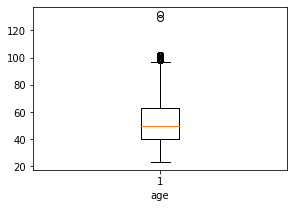

In [443]:
# Visualizing Outliers in Campaign Dataset

donor['age'].value_counts(dropna=False).sort_index(ascending = True)

fig2 = pyplot.figure(figsize=(10,3))
ax1 = fig2.add_subplot(1,2,1)

ax1.boxplot(donor['age'])
ax1.set_xlabel('age')

Assuming that such a high age of these 2 donors (age  132 and 129) could be a typo we repalcing them with appropriate values. Replace 132 with 32 and 129 with 29

In [444]:
# Checking the donors whose age is 132 and 129
donor[(donor['age'] > 120)]

,Unnamed: 0,donorID,zipcode,region,dateOfBirth,Gender_M,Gender_F,Gender_Missing,EN,FR,...,Walloon Brabant,West Flanders,East Flanders,Liege,Luxembourg,Namur,Hainaut,Limburg,ANTWERP,Missing
27008,27008,127009,9000,Flanders,1889-06-14,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
27453,27453,127454,8820,Flanders,1892-08-06,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [445]:
#Replace the donor age 131 & 128 with rectified values
gift_camp_don['age']=gift_camp_don['age'].replace([132],32)
gift_camp_don['age']=gift_camp_don['age'].replace([129],29)

# Outliers in Gift amount

Text(0.5, 0, 'amount')

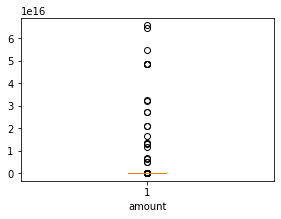

In [446]:
# Visualizing Outliers in Campaign Dataset

gift['amount'].value_counts(dropna=False).sort_index(ascending = True)

fig2 = pyplot.figure(figsize=(10,3))
ax1 = fig2.add_subplot(1,2,1)

ax1.boxplot(gift['amount'])
ax1.set_xlabel('amount')

In [447]:
gift_test = gift.sort_values('amount')

In [448]:
gift_test

,Unnamed: 0,donorID,campaignID,amount,date,gift_year,gift_month,gift_day,Number_Of_Donation,Donation_Per_Year
152747,152747,123109,2090,1.000000e+00,2009-05-18,2009,5,18,32,3.555556
210571,210571,141801,4144,2.000000e+00,2015-06-11,2015,6,11,19,1.583333
159456,159456,124744,5016,2.000000e+00,2017-10-31,2017,10,31,32,2.909091
190423,190423,133209,3815,3.000000e+00,2014-09-23,2014,9,23,14,2.000000
89756,89756,111010,2415,3.000000e+00,2010-06-10,2010,6,10,4,2.000000
...,...,...,...,...,...,...,...,...,...,...
56480,56480,106396,0,4.833400e+16,2001-03-20,2001,3,20,121,12.100000
56483,56483,106396,0,4.833400e+16,2002-05-31,2002,5,31,2,1.000000
124568,124568,117401,0,5.453800e+16,2006-03-25,2006,3,25,21,5.250000
216264,216264,144623,0,6.448000e+16,2007-06-08,2007,6,8,7,1.400000


# Joining all cleaned tables together and creating seperate tables for train set and Test set

# Generating Training Data Set by mapping the train_set(6169)

In [449]:
#As datatypes of CampaignID is different in each table merge is returning zero records. 
#Hence changing datatype of campaignID to Int in both tables
gift['campaignID']= gift['campaignID'].astype(int)

In [450]:
#merge donor_trainset table with gift table based on donorid
donor_trainset_gift= pd.concat([donor_trainset, gift], axis=1, join="inner")

In [451]:
#create Final Train set table for campaignID 6169 by oining  with campaign table
Final_Table_6169= pd.concat([donor_trainset_gift, campaign], axis=1, join="outer")
Final_Table_6169.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34874 entries, 0 to 34873
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          34874 non-null  int64         
 1   donorID             34874 non-null  int64         
 2   zipcode             34874 non-null  int32         
 3   region              34874 non-null  object        
 4   dateOfBirth         34874 non-null  datetime64[ns]
 5   Gender_M            34874 non-null  uint8         
 6   Gender_F            34874 non-null  uint8         
 7   Gender_Missing      34874 non-null  uint8         
 8   EN                  34874 non-null  uint8         
 9   FR                  34874 non-null  uint8         
 10  NL                  34874 non-null  uint8         
 11  gift_year           34874 non-null  int64         
 12  age                 34874 non-null  int64         
 13  age_6169            34874 non-null  int64     

# Generating Training Data Set by mapping the train_set(7244)

In [452]:
#merge donor_trainset table with gift table based on donorid
donor_testset_gift= pd.concat([donor_testset, gift], axis=1, join="inner")

In [453]:
#create Final Train set table for campaignID 6169 by oining  with campaign table
Final_Table_7244= pd.concat([donor_testset_gift, campaign], axis=1, join="outer")
Final_Table_7244.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          25645 non-null  int64         
 1   donorID             25645 non-null  int64         
 2   zipcode             25645 non-null  int32         
 3   region              25645 non-null  object        
 4   dateOfBirth         25645 non-null  datetime64[ns]
 5   Gender_M            25645 non-null  uint8         
 6   Gender_F            25645 non-null  uint8         
 7   Gender_Missing      25645 non-null  uint8         
 8   EN                  25645 non-null  uint8         
 9   FR                  25645 non-null  uint8         
 10  NL                  25645 non-null  uint8         
 11  gift_year           25645 non-null  int64         
 12  age                 25645 non-null  int64         
 13  age_6169            25645 non-null  int64     